In [1]:
import json
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

# Setting a style template
print(plt.style.available)
plt.style.use('seaborn-v0_8')  # Or choose from ['seaborn', 'classic', 'bmh', 'dark_background', etc.]

# Customizing the Matplotlib parameters
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.color'] = 'r'
#mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
#mpl.rcParams['axes.labelsize'] = 12
#mpl.rcParams['axes.labelcolor'] = 'black'
#mpl.rcParams['axes.titlesize'] = 14
#mpl.rcParams['xtick.labelsize'] = 10
#mpl.rcParams['ytick.labelsize'] = 10
#mpl.rcParams['legend.fontsize'] = 10
#mpl.rcParams['figure.figsize'] = [8, 6]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams['figure.titleweight'] = 'bold'

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
file_path = 'accuracy_default_qubit_sample.json'
data_default_qubit_sample = None
with open(file_path, 'r') as file:
    data_default_qubit_sample = json.load(file)

file_path_leena = 'accuracy_leena.json'
data_leena = None
with open(file_path_leena, 'r') as file:
    data_leena = json.load(file)

file_path_full_state_vector = 'accuracy_full_state_vector.json'
data_full_state_vector = None
with open(file_path_full_state_vector, 'r') as file:
    data_full_state_vector = json.load(file)

In [9]:
def plot_comparison_chart_corrected(data1, data2, data3, identifier, title):
    """Function to plot a corrected comparison bar chart for the three datasets."""
    labels = ['train', 'valid', 'test']
    accuracy_data1 = [data1[identifier].get(key, 0) for key in labels]
    accuracy_data2 = [data2[identifier].get(key, 0) for key in labels]
    accuracy_data3 = [data3[identifier].get(key, 0) for key in labels]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars
    
    # Define your colors here
    color_for_full_state_vector_simulation = '#3cba54'  # A shade of green
    color_for_simulated_leena = '#96d2af'  # A lighter shade of green
    default_qubit_green = '#2e8b57'  # A shade of green

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, accuracy_data2, width, label='Pennylane full state' , color=default_qubit_green)
    rects2 = ax.bar(x, accuracy_data1, width, label='Pennylane default qubit sampler', color=color_for_full_state_vector_simulation)
    rects3 = ax.bar(x + width, accuracy_data3, width, label='FakeApollo simulator (Qiskit Aer)', color=color_for_simulated_leena)

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fmt='%.2f')
    ax.bar_label(rects3, padding=3, fmt='%.2f')

    fig.tight_layout()

    return plt

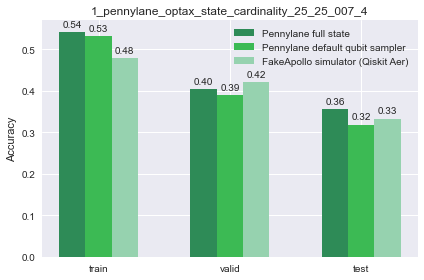

In [4]:
# Plotting corrected comparison chart for the first identifier

identifiers = [
    '1_pennylane_optax_state_cardinality_25_25_007_4',
    '5_pennylane_optax_state_cost_25_25_007_2',
    '8_pennylane_optax_state_Sim14Ansatz_cardinality_10_20_007_8',
    '9_pennylane_optax_adamw_state_Sim14Ansatz_execution_time_50_50_007_4'
    
]

identifier1 = identifiers[0]
plt_comparison_corrected1 = plot_comparison_chart_corrected(data_default_qubit_sample, data_full_state_vector, data_leena, identifier1, identifier1)
plt_comparison_corrected1.show()

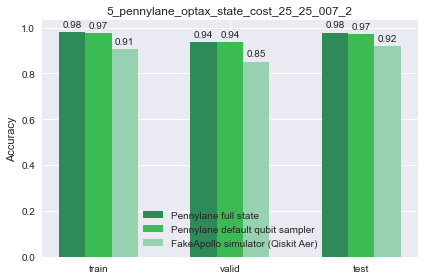

In [5]:
# Plotting comparison chart for the second identifier
identifier2 = identifiers[1]
plt_comparison_corrected2 = plot_comparison_chart_corrected(data_default_qubit_sample, data_full_state_vector, data_leena, identifier2, identifier2)
plt_comparison_corrected2.show()

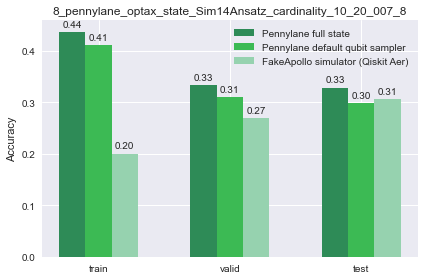

In [6]:
# Plotting comparison chart for the third identifier
identifier3 = identifiers[2]
plt_comparison_corrected3 = plot_comparison_chart_corrected(data_default_qubit_sample, data_full_state_vector, data_leena, identifier3, identifier3)
plt_comparison_corrected3.show()

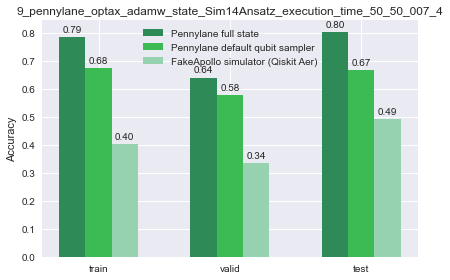

In [7]:
# Plotting comparison chart for the fourth identifier
identifier4 = identifiers[3]
plt_comparison_corrected4 = plot_comparison_chart_corrected(data_default_qubit_sample, data_full_state_vector, data_leena, identifier4, identifier4)
plt_comparison_corrected4.show()